# Importe das bibliotecas e dataframes

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_item = pd.read_csv('DNC_order_items_dataset.csv').drop('Unnamed: 0', axis=1)
df_review = pd.read_csv('DNC_order_reviews_dataset.csv').drop('Unnamed: 0', axis=1)
df_order = pd.read_csv('DNC_orders_dataset.csv').drop('Unnamed: 0', axis=1)
df_product = pd.read_csv('DNC_products_dataset.csv').drop('Unnamed: 0', axis=1)

# Análise de cada dataframe

## Itens

In [4]:
df_item.head()

,order_id,order_item_id,product_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90


In [24]:
df_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   order_item_id  112650 non-null  int64  
 2   product_id     112650 non-null  object 
 3   price          112650 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.4+ MB


In [86]:
df_item.duplicated().sum()

0

In [33]:
df_item['order_item_id'].value_counts()

1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: order_item_id, dtype: int64

In [18]:
df_item.groupby('order_id')['price'].sum().describe()

count    98666.000000
mean       137.754076
std        210.645145
min          0.850000
25%         45.900000
50%         86.900000
75%        149.900000
max      13440.000000
Name: price, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


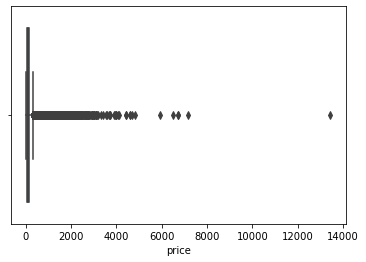

In [20]:
sns.boxplot(df_item.groupby('order_id')['price'].sum())
plt.show()

In [23]:
df_item.groupby('product_id')['price'].mean().describe()

count    32951.000000
mean       145.302464
std        246.895756
min          0.850000
25%         39.900000
50%         79.000000
75%        154.900000
max       6735.000000
Name: price, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


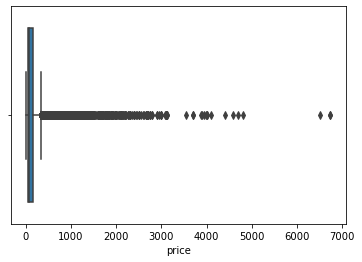

In [22]:
sns.boxplot(df_item.groupby('product_id')['price'].mean())
plt.show()

## Review

In [5]:
df_review.head()

,review_id,order_id,review_score
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5


In [34]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review_id     99224 non-null  object
 1   order_id      99224 non-null  object
 2   review_score  99224 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


In [87]:
df_review.duplicated().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='review_score', ylabel='count'>

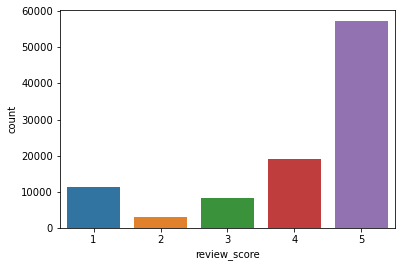

In [39]:
sns.countplot(df_review['review_score'])

## Order

In [6]:
df_order.head()

,order_id,customer_id,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered


In [40]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      99441 non-null  object
 1   customer_id   99441 non-null  object
 2   order_status  99441 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


In [88]:
df_order.duplicated().sum()

0

In [45]:
df_order['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


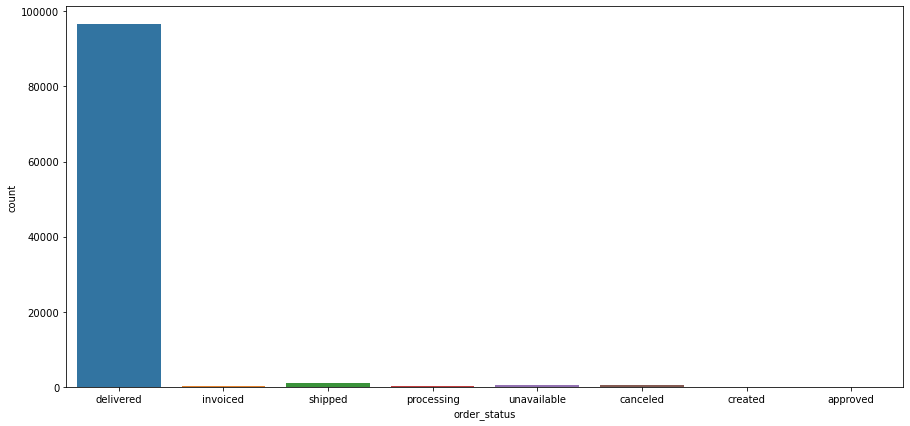

In [44]:
plt.figure(figsize=(15,7))
sns.countplot(df_order['order_status'])
plt.show()

## Product

In [7]:
df_product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,625.0,20.0,17.0,13.0


In [50]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_weight_g            32949 non-null  float64
 5   product_length_cm           32949 non-null  float64
 6   product_height_cm           32949 non-null  float64
 7   product_width_cm            32949 non-null  float64
dtypes: float64(6), object(2)
memory usage: 2.0+ MB


In [89]:
df_product.duplicated().sum()

0

In [51]:
df_product.describe()

,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,40425.000000,105.000000,105.000000,118.000000


In [47]:
df_product['product_category_name'].nunique()

73

In [49]:
df_product['product_category_name'].value_counts()[:21]

cama_mesa_banho                      3029
esporte_lazer                        2867
moveis_decoracao                     2657
beleza_saude                         2444
utilidades_domesticas                2335
automotivo                           1900
informatica_acessorios               1639
brinquedos                           1411
relogios_presentes                   1329
telefonia                            1134
bebes                                 919
perfumaria                            868
papelaria                             849
fashion_bolsas_e_acessorios           849
cool_stuff                            789
ferramentas_jardim                    753
pet_shop                              719
eletronicos                           517
construcao_ferramentas_construcao     400
eletrodomesticos                      370
malas_acessorios                      349
Name: product_category_name, dtype: int64

# Perguntas sobre os dados

## Quais são os 1000 produtos com mais avaliações e suas médias?

In [52]:
df_merge = df_item.merge(df_review, how='left', on='order_id')
df_merge.head()

,order_id,order_item_id,product_id,price,review_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,97ca439bc427b48bc1cd7177abe71365,5.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,7b07bacd811c4117b742569b04ce3580,4.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,0c5b33dea94867d1ac402749e5438e8b,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,f4028d019cb58564807486a6aaf33817,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,940144190dcba6351888cafa43f3a3a5,5.0


In [95]:
df_top1000 = df_merge.groupby(by='product_id', as_index=False).agg({'order_id': pd.Series.nunique,  
                                                                   'review_score':np.mean}) \
    .rename(columns={'order_id': 'product_sales'}) \
    .sort_values('product_sales', ascending = False)
df_top1000.drop_duplicates(inplace=True)
df_top1000 = df_top1000[:1001]
df_top1000['review_score'] = df_top1000['review_score'].round(2)
df_top1000.sort_values('review_score', ascending = False, inplace=True)

In [96]:
df_top1000

,product_id,product_sales,review_score
8103,3e4176d545618ed02f382a3057de32b4,24,4.96
12776,62c89abe1afe3a23c17765d462718a4c,16,4.94
28667,de480e3ae31eea2d2d97d694c43172fc,16,4.89
29844,e7f85e7f0203b7b95cc1b4c21b4b070c,21,4.87
14933,73326828aa5efe1ba096223de496f596,53,4.83
...,...,...,...
23184,b4b817e5f2c4efc8253b4b679c653847,18,2.67
17708,89b121bee266dcd25688a1ba72eefb61,62,2.40
22838,b1d207586fca400a2370d50a9ba1da98,43,1.92
26437,cd46a885543f0e169a49f1eb25c04e43,28,1.83


## Quais são as características dos 1000 produtos mais vendidos?

In [97]:
df_top1000_backup = df_top1000

In [110]:
df_top1000 = df_top1000_backup

In [111]:
df_top1000 = df_top1000.merge(df_product, how='left', on='product_id')

In [112]:
df_top1000.head()

,product_id,product_sales,review_score,product_category_name,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,3e4176d545618ed02f382a3057de32b4,24,4.96,malas_acessorios,35.0,468.0,1200.0,40.0,22.0,30.0
1,62c89abe1afe3a23c17765d462718a4c,16,4.94,perfumaria,51.0,805.0,540.0,23.0,13.0,19.0
2,de480e3ae31eea2d2d97d694c43172fc,16,4.89,informatica_acessorios,48.0,535.0,150.0,16.0,5.0,11.0
3,e7f85e7f0203b7b95cc1b4c21b4b070c,21,4.87,cool_stuff,42.0,582.0,5575.0,60.0,22.0,47.0
4,73326828aa5efe1ba096223de496f596,53,4.83,alimentos,32.0,1392.0,330.0,20.0,15.0,16.0


In [113]:
df_top1000.isnull().sum()

product_id                     0
product_sales                  0
review_score                   0
product_category_name         11
product_name_lenght           11
product_description_lenght    11
product_weight_g               1
product_length_cm              1
product_height_cm              1
product_width_cm               1
dtype: int64

In [114]:
df_top1000.dropna(inplace=True)

In [115]:
df_top1000.isnull().sum()

product_id                    0
product_sales                 0
review_score                  0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

## Dumificando as categorias dos produtos

In [131]:
df_top1000 = pd.get_dummies(df_top1000, columns=['product_category_name'])

In [132]:
df_top1000.head()

,product_id,product_sales,review_score,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_agro_industria_e_comercio,...,product_category_name_papelaria,product_category_name_pcs,product_category_name_perfumaria,product_category_name_pet_shop,product_category_name_portateis_casa_forno_e_cafe,product_category_name_relogios_presentes,product_category_name_tablets_impressao_imagem,product_category_name_telefonia,product_category_name_telefonia_fixa,product_category_name_utilidades_domesticas
0,3e4176d545618ed02f382a3057de32b4,24,4.96,35.0,468.0,1200.0,40.0,22.0,30.0,0,...,0,0,0,0,0,0,0,0,0,0
1,62c89abe1afe3a23c17765d462718a4c,16,4.94,51.0,805.0,540.0,23.0,13.0,19.0,0,...,0,0,1,0,0,0,0,0,0,0
2,de480e3ae31eea2d2d97d694c43172fc,16,4.89,48.0,535.0,150.0,16.0,5.0,11.0,0,...,0,0,0,0,0,0,0,0,0,0
3,e7f85e7f0203b7b95cc1b4c21b4b070c,21,4.87,42.0,582.0,5575.0,60.0,22.0,47.0,0,...,0,0,0,0,0,0,0,0,0,0
4,73326828aa5efe1ba096223de496f596,53,4.83,32.0,1392.0,330.0,20.0,15.0,16.0,0,...,0,0,0,0,0,0,0,0,0,0


# Exportando o df com os produtos mais vendidos

In [133]:
df_top1000.to_csv('ProdutosMaisVendidos.csv', encoding='utf-8', index=False)